In [1]:
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Получаем ПРАВИЛЬНЫЙ путь к корню проекта
project_dir = os.path.abspath(os.path.join('..'))  # Поднимаемся на уровень выше notebooks/
print(f"Корень проекта: {project_dir}")

# 2. Пути к ключевым папкам
data_dir = os.path.join(project_dir, 'data')
scripts_dir = os.path.join(project_dir, 'scripts')
models_dir = os.path.join(project_dir, 'models')
reports_dir = os.path.join(project_dir, 'reports')

# 3. Создаем папки, если их нет
os.makedirs(data_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(reports_dir, exist_ok=True)

# 4. Проверяем содержимое data/
try:
    print(f"Содержимое data/: {os.listdir(data_dir)}")
except FileNotFoundError:
    print(f"Папка {data_dir} не найдена! Проверьте структуру проекта.")

# 5. Добавляем scripts в пути импорта
sys.path.append(scripts_dir)

# 6. Импорт функций
from preprocessing import preprocess_data
from train_model import train_and_evaluate

# 7. Загрузка и обработка данных
try:
    df = preprocess_data(
        input_path=os.path.join(data_dir, 'train.csv'),
        output_path=os.path.join(data_dir, 'processed_train.csv')
    )
    print("Данные успешно обработаны!")
except Exception as e:
    print(f"Ошибка при обработке данных: {str(e)}")

Корень проекта: C:\Users\Максим\Documents\GitHub\house_price_prediction
Содержимое data/: ['.ipynb_checkpoints', '.~lock.data_description.txt#', 'data_description.txt', 'processed_train.csv', 'train.csv']
Данные успешно обработаны и сохранены в C:\Users\Максим\Documents\GitHub\house_price_prediction\data\processed_train.csv
Данные успешно обработаны!


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,...,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000
mean,730.906815,57.061892,3.028512,69.579277,10401.338665,0.995828,0.028512,1.954103,2.776773,0.000695,...,2.415160,1.997218,1.889430,1.996523,44.154381,6.332406,2007.820584,7.526426,3.760779,175844.522253
std,422.386672,42.530119,0.636312,21.836465,9945.341842,0.064482,0.166488,1.407548,0.709486,0.026371,...,37.768672,0.064557,0.440961,0.087423,499.876935,2.701981,1.326805,1.554059,1.098398,67475.861228
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,364.250000,20.000000,3.000000,60.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129500.000000
50%,731.500000,50.000000,3.000000,69.000000,9400.000000,1.000000,0.000000,3.000000,3.000000,0.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,161500.000000
75%,1095.750000,70.000000,3.000000,78.000000,11441.000000,1.000000,0.000000,3.000000,3.000000,0.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,210000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,738.000000,2.000000,3.000000,3.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,415298.000000


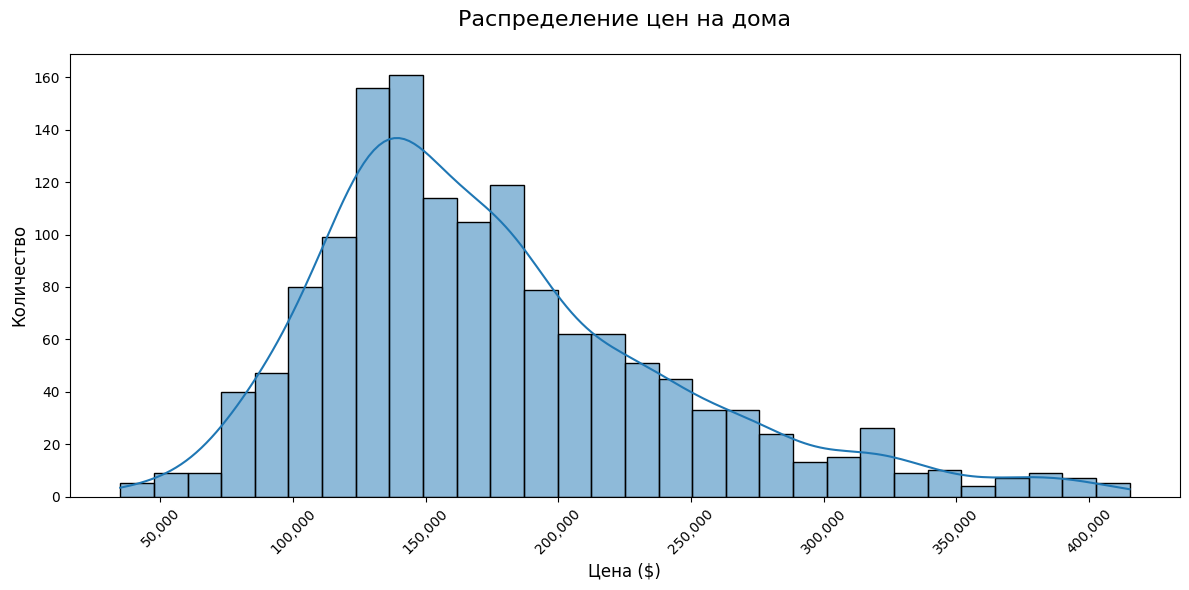

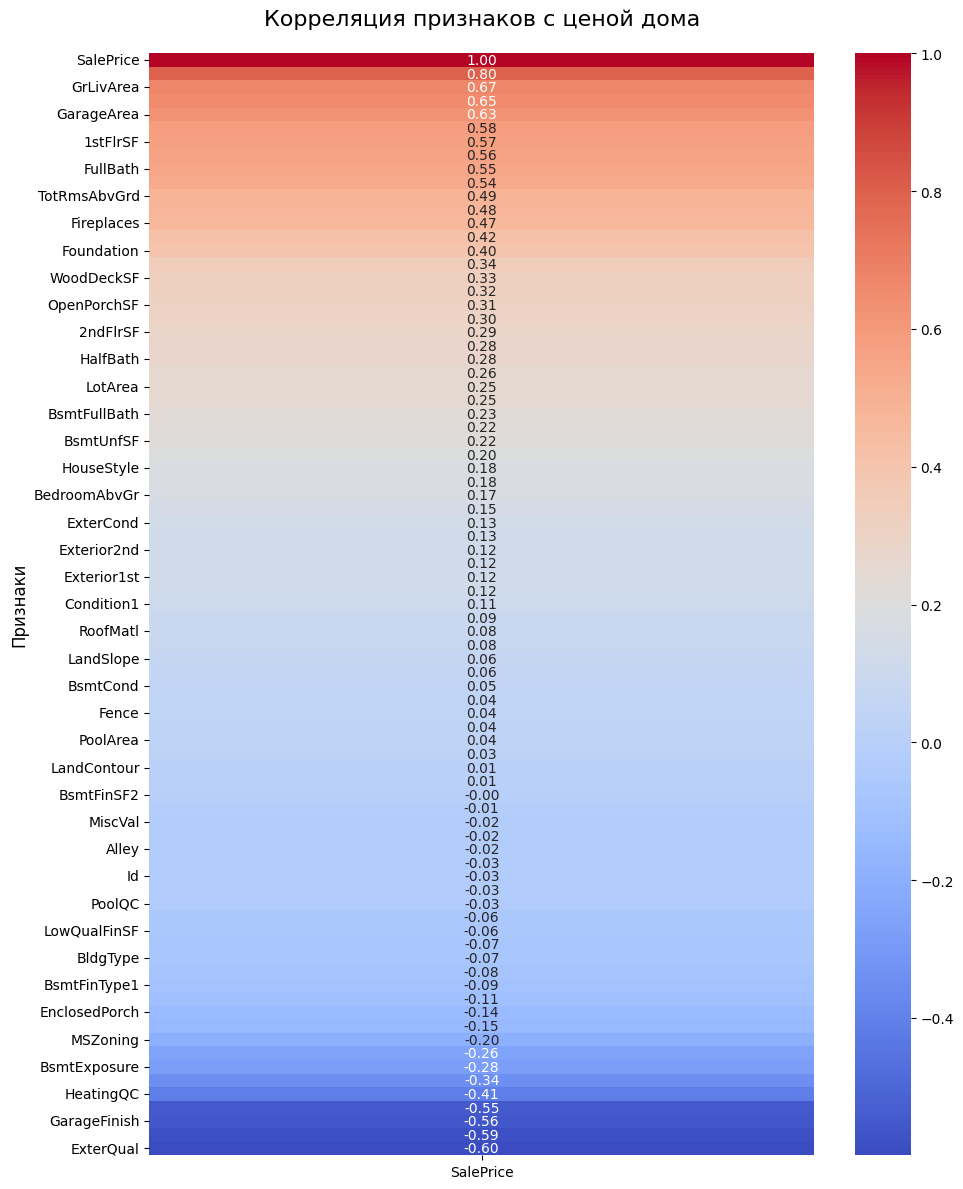

In [2]:
# 2. EDA (анализ)
if 'df' in locals():
    display(df.head())
    display(df.describe())
    
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(df['SalePrice'], kde=True, bins=30)
    plt.title("Распределение цен на дома", fontsize=16, pad=20)
    plt.xlabel("Цена ($)", fontsize=12)
    plt.ylabel("Количество", fontsize=12)

    # Форматирование подписей цен на оси X
    ax.get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))
    )
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # Корреляция
    plt.figure(figsize=(10, 12))
    corr_matrix = df.corr(numeric_only=True)
    heatmap = sns.heatmap(
    corr_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size": 10}
    )
    plt.title("Корреляция признаков с ценой дома", fontsize=16, pad=20)
    plt.xlabel("")
    plt.ylabel("Признаки", fontsize=12)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
    plt.tight_layout()
    plt.show()

In [3]:
# 3. Обучение модели и анализ результатов
try:
    # Получаем путь к папке reports
    reports_dir = os.path.join(project_dir, 'reports')
    metrics_path = os.path.join(reports_dir, 'metrics.json')
    
    # Запускаем обучение модели
    train_and_evaluate()
    
    # Загрузка результатов
    if os.path.exists(metrics_path):
        with open(metrics_path, 'r') as f:
            metrics = json.load(f)
        print("Метрики модели:", metrics)
    else:
        print(f"Файл {metrics_path} не найден! Проверьте выполнение train_model.py")
        
except Exception as e:
    print(f"Ошибка при обучении модели: {e}")

Модель успешно обучена и сохранена!
Метрики модели: {'MSE': 645612290.7668228, 'R2': 0.8509761152058919}
